## <p align="center">Adidas Sales Data Analysis Project</p>


In [1]:
# Importing essential libraires for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

In [2]:
# Setting Seaborn style for better visual aesthetics
sns.set(style="whitegrid")

In [3]:
# Loading the Adidas sales dataset and displaying the first five rows
df = pd.read_csv('AdidasSalesdata.csv')

In [4]:
# Converting 'Invoice Date' to datetime, extracting month, and weekday name from the 'Invoice Date' column
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')
df['Month'] = df['Invoice Date'].dt.month
df['Weekday'] = df['Invoice Date'].dt.day_name()

In [5]:
# Displaying few rows of the dataset
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Weekday
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750,24062.5,0.35,Outlet,10,Tuesday
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250,30375.0,0.30,Outlet,10,Wednesday
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750,117562.5,0.55,Outlet,10,Thursday
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250,19687.5,0.35,Outlet,10,Friday
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250,24500.0,0.40,Outlet,10,Saturday


### Dataset Description

This dataset contains retail sales transaction records from a company like Foot Locker. Each record represents a **single sales transaction** with information about the retailer, product details, customer type (gender), financials (sales, profit), and temporal details (date, month, weekday).

The dataset is **structured**, **clean** (no missing values), and suitable for tasks like:
- Sales analysis
- Profitability analysis
- Time-series trend detection
- Regional performance analysis
- Predictive modeling (e.g., sales forecasting)

---

### Features Overview

| Feature Name        | Data Type        | Description |
|---------------------|------------------|-------------|
| **Retailer**         | `object`          | Name of the retailer where the sale occurred (e.g., Foot Locker). |
| **Retailer ID**      | `int64`           | Unique numeric ID assigned to each retailer. |
| **Invoice Date**     | `datetime64[ns]`  | Date when the transaction was recorded. |
| **Region**           | `object`          | Geographical region where the sale was made (e.g., Northeast). |
| **State**            | `object`          | State within the region where the sale occurred (e.g., Pennsylvania). |
| **City**             | `object`          | Specific city where the retailer is located (e.g., Philadelphia). |
| **Gender Type**      | `object`          | Gender category of the product's target audience (e.g., Men, Women). |
| **Product Category** | `object`          | Category of the product sold (e.g., Apparel, Street Footwear). |
| **Price per Unit**   | `int64`           | Price of a single unit of the product sold. |
| **Units Sold**       | `int64`           | Number of product units sold in that transaction. |
| **Total Sales**      | `int64`           | Total sales amount (Price per Unit × Units Sold). |
| **Operating Profit** | `float64`         | Profit earned after deducting operating expenses. |
| **Operating Margin** | `float64`         | Ratio of operating profit to total sales (expressed as a decimal). |
| **Sales Method**     | `object`          | Channel through which the sale occurred (e.g., Outlet, Online). |
| **Month**            | `int32`           | Month extracted from the Invoice Date (1-12). |
| **Weekday**          | `object`          | Day of the week when the transaction took place (e.g., Tuesday). |

In [6]:
# Displaying summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   int64         
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
 14  Month             9648 n

#### Dataset Insights

- The dataset contains **9,648 entries** (rows) and **16 columns** (features).
- There are **no missing values** in any of the columns — all columns have 9,648 non-null entries.
- The dataset uses various data types:
  - **Categorical (object)** columns: Retailer, Region, State, City, Gender Type, Product Category, Sales Method, Weekday.
  - **Numerical (int64, int32)** columns: Retailer ID, Price per Unit, Units Sold, Total Sales, Month.
  - **Financial (float64)** columns: Operating Profit, Operating Margin.
  - **DateTime (datetime64[ns])** column: Invoice Date.
- The memory usage of the dataset is approximately **1.1 MB**, indicating it's lightweight and manageable for analysis.
- The **Month** column is of type int32, likely extracted from the Invoice Date for easier time-based analysis.
- Financial metrics like **Operating Profit** and **Operating Margin** are available, which are critical for profitability analysis.
- The dataset covers **both sales method** and **product category segmentation**, allowing detailed breakdowns.

---

In [7]:
# Generating descriptive statistics for the DataFrame
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Month
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119552,45.216625,256.930037,93273.437500,34425.244761,0.422991,6.458126
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,1.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000,3.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000,6.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000,9.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,12.000000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,3.454799


#### Statistical Summary Insights

- The dataset contains **9,648 entries** for all numerical features.
- **Retailer ID** ranges from approximately **1,128,299** to **1,197,831**, suggesting retailer codes within a specific ID range.
- **Invoice Date**:
  - Sales data spans from **January 1, 2020** to **December 31, 2021**.
  - The median date (50%) is around **June 4, 2021**, indicating balanced data across the time period.
- **Price per Unit**:
  - Minimum price: **7** units
  - Maximum price: **110** units
  - Average price: approximately **45.22** units
- **Units Sold**:
  - Sales range from **0** units (unsuccessful transactions) to **1,275** units in a single invoice.
  - Median (50%) units sold is **176**, showing moderately high transaction volumes.
- **Total Sales**:
  - Ranges from **0** to **825,000**.
  - Mean total sales value: around **93,273**.
  - The large gap between mean and max suggests the presence of some very large transactions (possible outliers).
- **Operating Profit**:
  - Profit ranges from **0** to **390,000**.
  - The average operating profit is **34,425**, with a standard deviation indicating high variability in profits.
- **Operating Margin**:
  - Varies from **0.10** to **0.80**.
  - Average operating margin: **0.423** (42.3%), indicating strong overall profitability.
- **Month**:
  - Values range from **1 (January)** to **12 (December)**.
  - The average month value (6.46) aligns near **June**, again suggesting balanced data across all months.

---

  Key observation:  
There are possible **outliers** in Units Sold, Total Sales, and Operating Profit, considering their large maximum values compared to their means. These should be treated carefully during modeling or visualization.



In [8]:
# Grouping the data by 'Product Category' to calculate sum of 'Units Sold', 'Total Sales', 'Operating Profit' and mean of 'Operating Margin'
# then sorting by 'Operating Profit'

product_perf = df.groupby('Product Category').agg({
    'Units Sold': 'sum',
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Operating Margin': 'mean'
}).sort_values(by='Operating Profit', ascending=False).round(2).reset_index()
product_perf

,Product Category,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Street Footwear,985589,336829057,1.278981e+08,0.43
1,Apparel,740510,302767492,1.134140e+08,0.43
2,Athletic Footwear,752762,260305576,9.082267e+07,0.41


### Product Category Performance Insights
- **Street Footwear** leads in **Units Sold** (985,589 units) and **Total Sales** (336.8M), driving the highest **Operating Profit**.
- **Apparel** follows closely with **740,510 units sold** and **302.8M in sales**, maintaining a **strong operating margin of 0.43**.
- **Athletic Footwear** shows solid performance, with **752,762 units sold** and **260.3M in sales**, but with a slightly **lower operating margin of 0.41**.

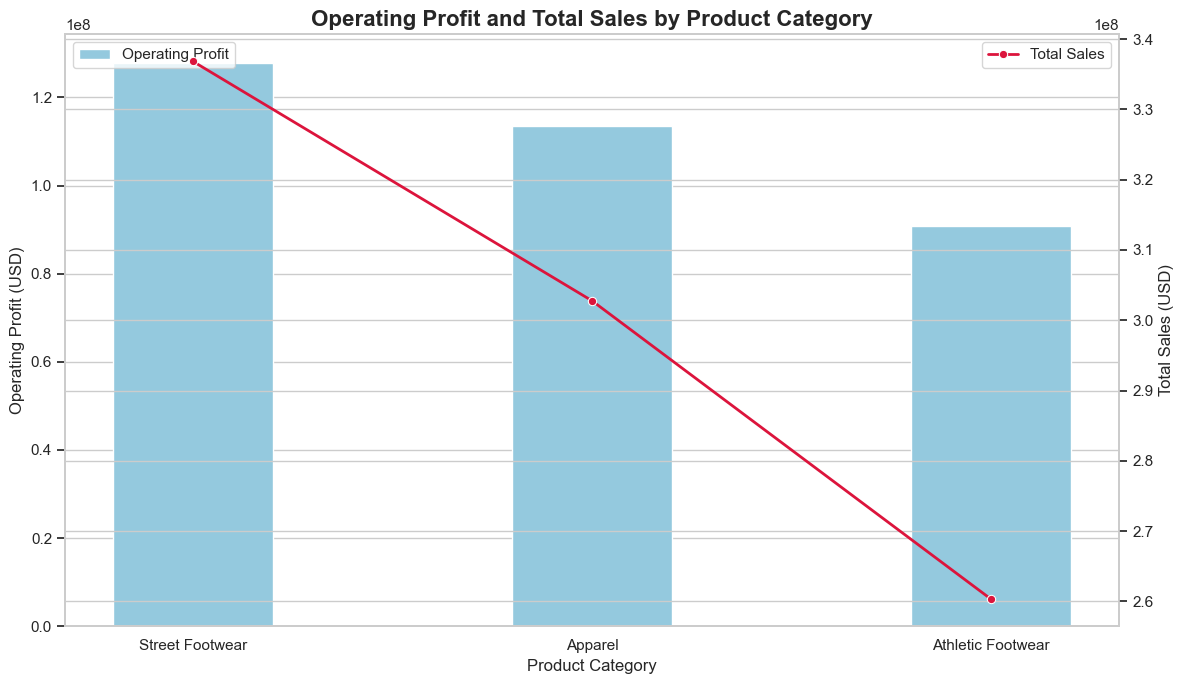

In [9]:
# Creating a dual-axis plot to visualize 'Operating Profit' as a bar plot and 'Total Sales' as a line plot by 'Product Category'

fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(data=product_perf, x='Product Category', y='Operating Profit', color='skyblue', ax=ax1, label='Operating Profit', width=0.4)
ax2 = ax1.twinx()
sns.lineplot(data=product_perf, x='Product Category',y='Total Sales',color='crimson',marker='o',linewidth=2,label='Total Sales',ax=ax2)
ax1.set_title('Operating Profit and Total Sales by Product Category', fontsize=16, fontweight='bold')
ax1.set_ylabel('Operating Profit (USD)', fontsize=12)
ax2.set_ylabel('Total Sales (USD)', fontsize=12)
ax1.set_xlabel('Product Category', fontsize=12)
plt.xticks(rotation=30, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Key Insights from the Graph

- **Operating Profit**:  **Street Footwear** leads, followed by **Apparel**, and **Athletic Footwear** has the lowest.
- **Total Sales**: **Street Footwear** leads in total sales, followed by **Apparel**, and **Athletic Footwear** has the lowest.
- **Correlation**:  Positive correlation between **Operating Profit** and **Total Sales**.
- **Category Performance**:  **Street Footwear** outperforms the others in both metrics.
- **Improvement Area**:  **Athletic Footwear** shows the lowest performance, suggesting potential for growth.


In [10]:
# Grouping the data by 'Retailer' to calculate sum of 'Units Sold', 'Total Sales', 'Operating Profit' and mean of 'Operating Margin'
#then sorting by 'Operating Profit'

retail_perf = df.groupby('Retailer').agg({
    'Units Sold': 'sum',
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Operating Margin': 'mean'
}).sort_values(by='Operating Profit', ascending=False).round(2).reset_index()
retail_perf

,Retailer,Units Sold,Total Sales,Operating Profit,Operating Margin
0,West Gear,625262,242964333,85667873.18,0.42
1,Foot Locker,604369,220094720,80722124.81,0.42
2,Sports Direct,557640,182470997,74332954.96,0.44
3,Kohl's,287375,102114753,36811252.58,0.42
4,Amazon,197990,77698912,28818503.31,0.42
5,Walmart,206225,74558410,25782052.61,0.41


### Retailer Performance Insights

- **West Gear** leads in **Units Sold** (625,262), **Total Sales** (242.96M), and **Operating Profit** (85.67M), with an **Operating Margin** of 0.42.
- **Foot Locker** follows closely with **Units Sold** (604,369), **Total Sales** (220.09M), and **Operating Profit** (80.72M), also with an **Operating Margin** of 0.42.
- **Sports Direct** has a slightly higher **Operating Margin** (0.44), but lower **Units Sold** (557,640) and **Total Sales** (182.47M) than **West Gear** and **Foot Locker**.
- **Kohl's** has lower figures across the board with **Units Sold** (287,375), **Total Sales** (102.11M), **Operating Profit** (36.81M), and an **Operating Margin** of 0.42.
- **Amazon** and **Walmart** show the lowest performance, with **Units Sold** (197,990 for Amazon, 206,225 for Walmart), **Total Sales** (77.70M for Amazon, 74.56M for Walmart), and lower **Operating Profits** (28.82M for Amazon, 25.78M for Walmart).

### Conclusion:
**West Gear** outperforms the others in overall sales and profit, while **Sports Direct** has the highest **Operating Margin**. **Amazon** and **Walmart** have the lowest performance, indicating areas for potential improvement.

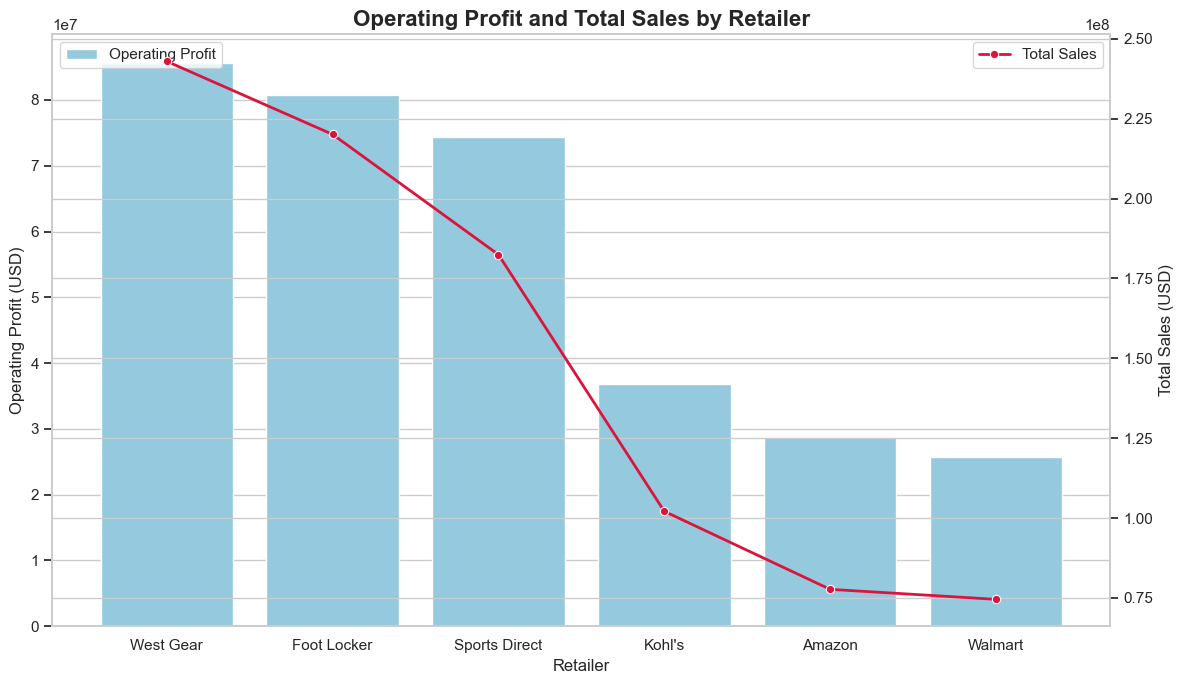

In [11]:
# Creating a dual-axis plot to visualize 'Operating Profit' as a bar plot and 'Total Sales' as a line plot by 'Retailer'

fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(data=retail_perf,x='Retailer',y='Operating Profit',color='skyblue',ax=ax1,label='Operating Profit')
ax2 = ax1.twinx()
sns.lineplot(data=retail_perf,x='Retailer',y='Total Sales',color='crimson',marker='o',linewidth=2,label='Total Sales',ax=ax2)
ax1.set_title('Operating Profit and Total Sales by Retailer', fontsize=16, fontweight='bold')
ax1.set_ylabel('Operating Profit (USD)', fontsize=12)
ax2.set_ylabel('Total Sales (USD)', fontsize=12)
ax1.set_xlabel('Retailer', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Key Insights from the Chart

- **West Gear** leads with the highest **Operating Profit** (> $80M) and **Total Sales** (~$240M).
- **Foot Locker** follows closely, with an **Operating Profit** of ~$80M and **Total Sales** of ~$225M.
- **Sports Direct** has a significant drop in both **Operating Profit** (~$75M) and **Total Sales** (<$180M).
- **Kohl's**, **Amazon**, and **Walmart** show lower performance, with **Operating Profits** below $30M and **Total Sales** around or below ~$70M, with Walmart having the lowest.

### Conclusion:
The performance disparity is clear, with **West Gear** and **Foot Locker** leading in both **Operating Profit** and **Total Sales**, while **Kohl's**, **Amazon**, and **Walmart** lag behind.

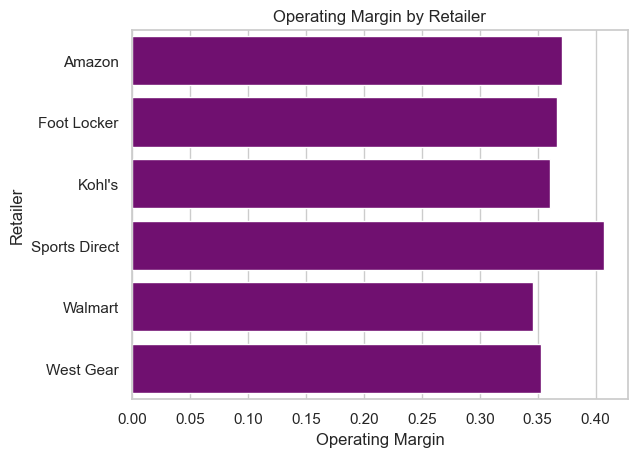

In [12]:
# Calculating and visualizing the 'Operating Margin' by 'Retailer' using a bar plot

retailer_margin = df.groupby('Retailer').agg({'Operating Profit': 'sum', 'Total Sales': 'sum'}).reset_index()
retailer_margin['Operating Margin'] = retailer_margin['Operating Profit'] / retailer_margin['Total Sales']
sns.barplot(x="Operating Margin", y="Retailer", data=retailer_margin, color="purple")
plt.title("Operating Margin by Retailer")
plt.show()

### Key Insights from the Bar Chart

- **Sports Direct** has the highest **Operating Margin** (~0.40).
- **Amazon** and **Foot Locker** have similar **Operating Margins** (~0.37).
- **Kohl's** has a slightly lower **Operating Margin** (~0.36).
- **Walmart** and **West Gear** have the lowest **Operating Margins** (~0.34).

### Conclusion:
**Sports Direct** is the most profitable in terms of operating margin, while **Walmart** and **West Gear** have the lowest profitability based on this metric.

In [13]:
# Grouping the data by 'Retailer' and 'Region' to calculate the sum of 'Total Sales' and 'Operating Profit'

retail_region_perf = df.groupby(['Retailer', 'Region'])[['Total Sales', 'Operating Profit']].sum().reset_index()
retail_region_perf

,Retailer,Region,Total Sales,Operating Profit
0,Amazon,Midwest,16835873,6833799.77
1,Amazon,Northeast,36262590,13398857.39
2,Amazon,South,409091,146947.48
3,Amazon,Southeast,10826333,4295093.92
4,Amazon,West,13365025,4143804.75
5,Foot Locker,Midwest,47987394,18245522.25
6,Foot Locker,Northeast,65326474,23914657.67
7,Foot Locker,South,9307025,3679974.61
8,Foot Locker,Southeast,59669118,22531766.77
9,Foot Locker,West,37804709,12350203.51


### Key Insights from the Retailer Data

- **Amazon**:
  - The **Northeast** region has the highest **Total Sales** (~$36M) and **Operating Profit** (~$13.4M).
  - The **South** region has the lowest **Total Sales** (~$409K) and **Operating Profit** (~$147K).
- **Foot Locker**:
  - The **Northeast** region leads in **Total Sales** (~$65M) and **Operating Profit** (~$23.9M).
  - The **South** region shows the lowest performance with **Total Sales** (~$9.3M) and **Operating Profit** (~$3.7M).
- **Kohl's**:
  - The **West** region has the highest **Total Sales** (~$62.3M) and **Operating Profit** (~$21.7M).
  - The **South** region has the lowest **Total Sales** (~$3.5M) and **Operating Profit** (~$1.4M).
- **Sports Direct**:
  - The **South** region has the highest **Total Sales** (~$65M) and **Operating Profit** (~$29.9M).
  - The **West** region has the lowest **Total Sales** (~$12.1M) and **Operating Profit** (~$4.6M).
- **Walmart**:
  - The **South** region leads in **Total Sales** (~$33M) and **Operating Profit** (~$13.0M).
  - The **West** region shows the lowest performance with **Total Sales** (~$6.8M) and **Operating Profit** (~$1.7M).
- **West Gear**:
  - The **West** region has the highest **Total Sales** (~$137M) and **Operating Profit** (~$45.1M).
  - The **Midwest** region has the lowest **Total Sales** (~$22.5M) and **Operating Profit** (~$8.5M).

### Conclusion:
- **West Gear** and **Foot Locker** perform strongly in the **West** and **Northeast** regions, while **Amazon** has a notable lead in the **Northeast**.
- **Walmart** and **Kohl's** show more varied performance across regions, with certain regions showing lower sales and profits.
- The **South** region tends to have lower performance for most retailers, especially for **Amazon** and **Walmart**.


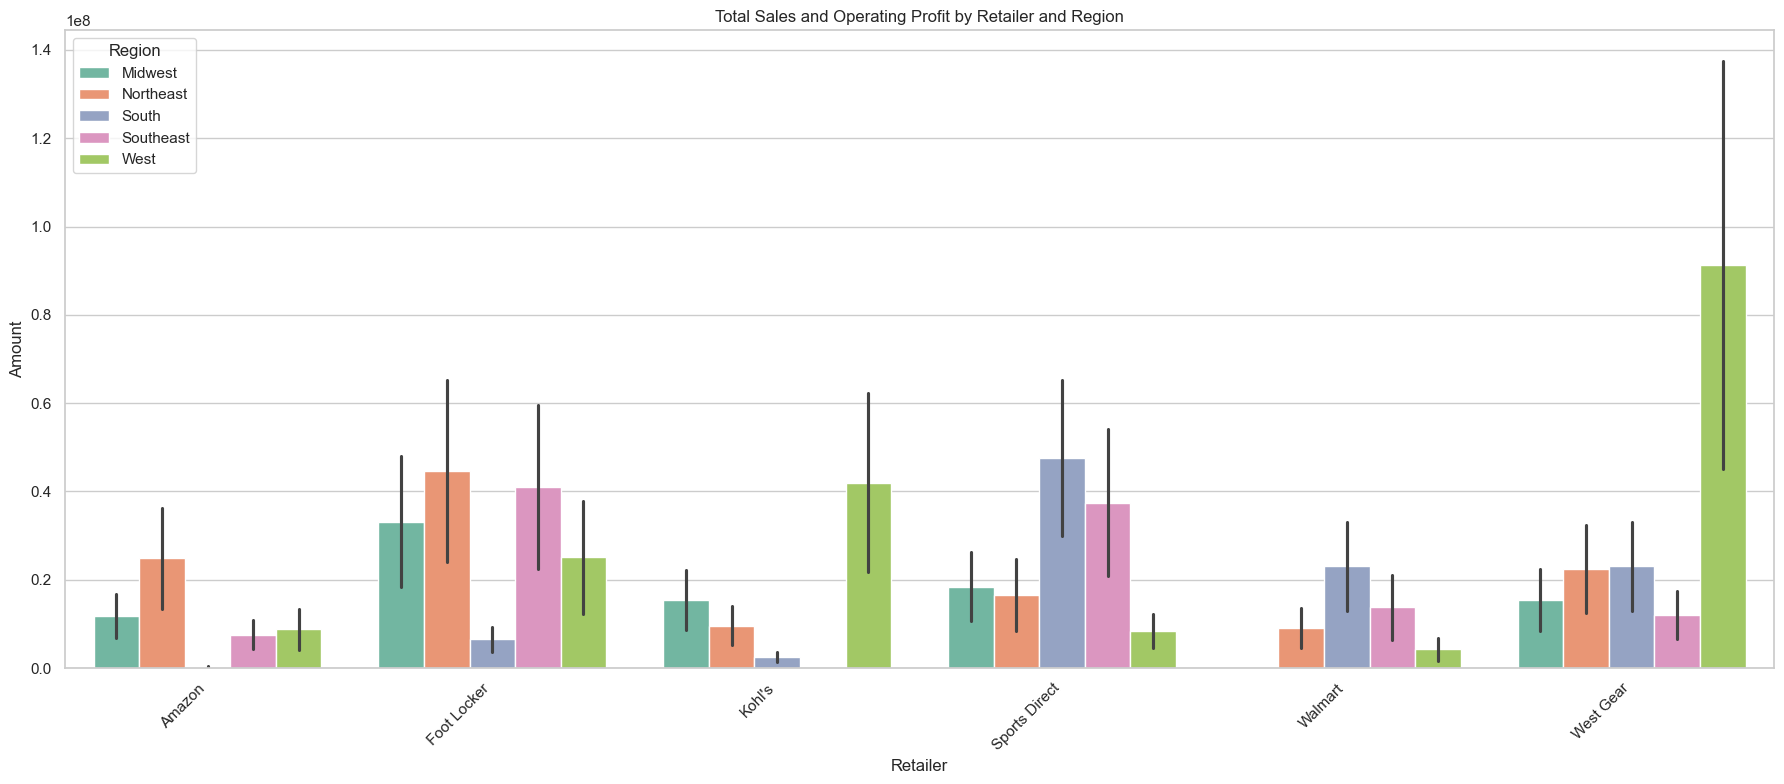

In [14]:
# Visualizing 'Total Sales' and 'Operating Profit' by 'Retailer' and 'Region' using a stacked bar plot

plt.figure(figsize=(18, 8))

retail_region_melted = retail_region_perf.melt(id_vars=['Retailer', 'Region'], value_vars=['Total Sales', 'Operating Profit'], var_name='Metric', value_name='Amount')
sns.barplot(data=retail_region_melted,x='Retailer',y='Amount',hue='Region',palette='Set2')

plt.title('Total Sales and Operating Profit by Retailer and Region')
plt.xlabel('Retailer')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### Key Insights from the Bar Chart

- **West Gear** leads in **Total Sales** and **Operating Profit**, especially in the **West** region.
- **Foot Locker** excels in the **Northeast** and **South** regions, showing strong market penetration.
- **Sports Direct** performs best in the **South** and **Midwest**, but underperforms in other regions.
- **Amazon** has **consistent** performance across all regions, with no significant peaks or dips.
- **Walmart** shows **lower performance** compared to others, with consistent but low sales and profits.
- **Kohl's** exhibits **weak performance** across all regions, lagging behind other retailers.
- The **Southeast** region shows **mixed performance**, with some retailers performing well and others struggling.
- The **Midwest** region displays a more **balanced performance**, with **West Gear** leading.

### Conclusion:
This analysis highlights the **regional strengths** and **weaknesses** of each retailer, providing insights into where they perform best and areas where they could improve.

In [15]:
# Grouping the data by 'City' to calculate sum of 'Total Sales', 'Operating Profit', and 'Units Sold'
# then sorting by 'Operating Profit' and selecting the top 10 cities

city_perf = df.groupby('City').agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Units Sold': 'sum'
}).sort_values(by='Operating Profit', ascending=False).reset_index().head(10)
city_perf

,City,Total Sales,Operating Profit,Units Sold
0,Charleston,39974797,15607190.11,102483
1,New York,39801235,13899973.16,111954
2,Miami,31600863,12168619.11,73135
3,Portland,30545652,10760799.37,72946
4,San Francisco,34539220,10256249.56,86900
5,Houston,25456882,9845141.06,90322
6,Charlotte,23956531,9756422.87,62936
7,Albany,24427804,9429850.91,57186
8,New Orleans,23750781,9417233.49,57615
9,Birmingham,17633424,9147581.39,63327


### Key Insights from City Data

- **Charleston** leads in both **Total Sales** (~$40M) and **Operating Profit** (~$15.6M), with the highest **Units Sold** (~102K).
- **New York** shows nearly identical **Total Sales** (~$39.8M) but with slightly lower **Operating Profit** (~$13.9M), despite a higher volume of **Units Sold** (~112K).
- **Miami** and **San Francisco** have **moderate performance** in **Total Sales** (~$31M - $34M), with Miami showing slightly lower profits.
- **Portland** and **Houston** show **lower sales and profit** compared to other cities, with **Portland** at ~$30M in sales.
- **Charlotte** and **Albany** have relatively lower **sales and profit**, around ~$24M in sales.
- **Birmingham** has the lowest **Total Sales** (~$17.6M), but its **Operating Profit** (~$9.1M) is competitive.

### Conclusion:
**Charleston** stands out as the top-performing city, while **Birmingham** shows the lowest overall performance. **New York** and **Miami** perform well, but other cities like **Portland**, **Charlotte**, and **Albany** show more modest results.

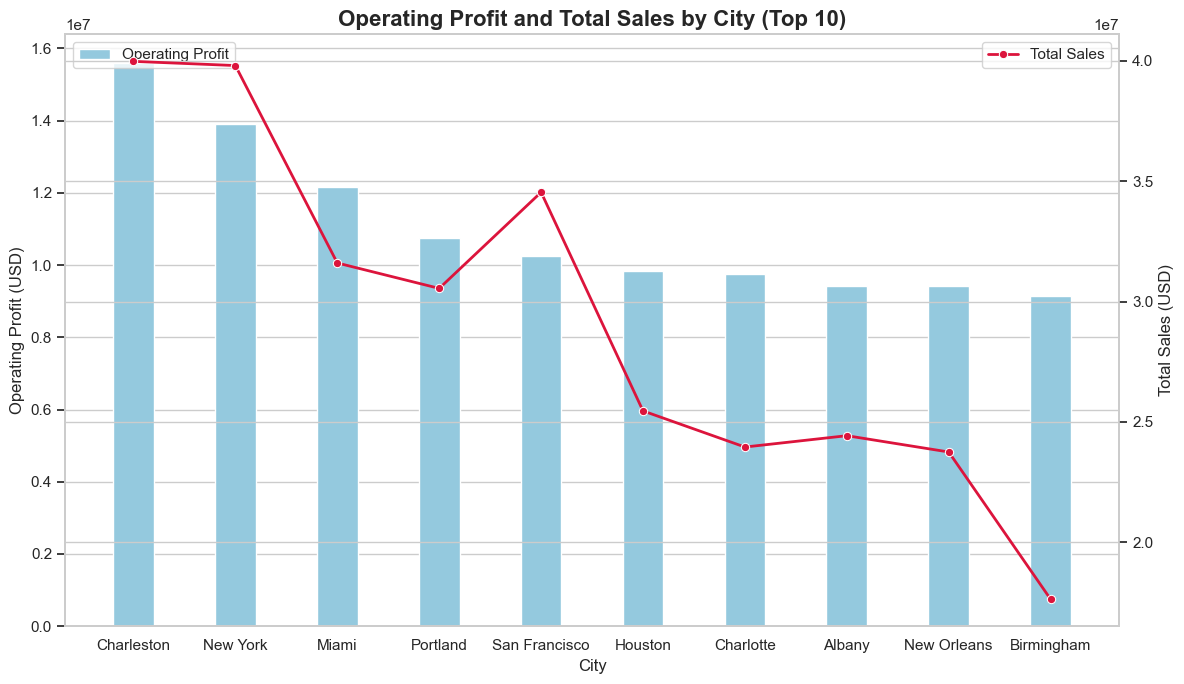

In [16]:
# Creating a dual-axis plot to visualize 'Operating Profit' as a bar plot and 'Total Sales' as a line plot for the top 10 cities

fig, ax1 = plt.subplots(figsize=(12, 7))
sns.barplot(data=city_perf,x='City',y='Operating Profit',color='skyblue',ax=ax1,label='Operating Profit',width=0.4)

ax2 = ax1.twinx()
sns.lineplot(data=city_perf,x='City',y='Total Sales',color='crimson',marker='o',linewidth=2,label='Total Sales',ax=ax2)

ax1.set_title('Operating Profit and Total Sales by City (Top 10)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Operating Profit (USD)', fontsize=12)
ax2.set_ylabel('Total Sales (USD)', fontsize=12)
ax1.set_xlabel('City', fontsize=12)

plt.xticks(rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Key Insights from City Performance (Bar and Line Chart)

- **Charleston and New York** have the highest operating profits, with Charleston slightly outperforming New York.
- **San Francisco** leads in **total sales**, significantly surpassing other cities, but its **operating profit** is moderate.
- **Birmingham** shows the **lowest performance** in both **operating profit** and **total sales**, indicating weaker market performance.
- **Miami, Portland, Houston, Charlotte, Albany, and New Orleans** display **consistent but moderate performance** in both metrics.
- **Discrepancies in Sales vs. Profit**: For instance, **San Francisco** has high sales but lower profits, suggesting higher operational costs or lower margins compared to **Charleston** and **New York**, which maintain high profits with lower sales.

### Conclusion:
The analysis shows that **higher total sales** do not always correlate with **higher operating profits**, highlighting the importance of cost management and other factors in determining profitability.

In [17]:
# Grouping the data by 'Sales Method' to calculate sum of 'Total Sales', 'Operating Profit', and mean of 'Operating Margin'

sales_method_perf = df.groupby('Sales Method').agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Operating Margin': 'mean'
}).reset_index()
sales_method_perf

,Sales Method,Total Sales,Operating Profit,Operating Margin
0,In-store,356643750,1.275913e+08,0.356121
1,Online,247672882,9.655518e+07,0.464152
2,Outlet,295585493,1.079883e+08,0.394876


### Key Insights from Sales Method Data

- **In-store** sales generate the highest **total sales** (~$356.6M) but have the lowest **operating margin** (0.36).
- **Online** sales show the highest **operating margin** (0.46), with **moderate total sales** (~$247.7M) and **operating profit** (~$96.6M).
- **Outlet** sales have **moderate total sales** (~$295.6M) and **operating profit** (~$107.9M), with an **operating margin** of 0.39, falling between in-store and online.

### Conclusion:
**Online sales** yield the highest profitability (operating margin), while **in-store sales** generate the highest revenue but with a lower margin.

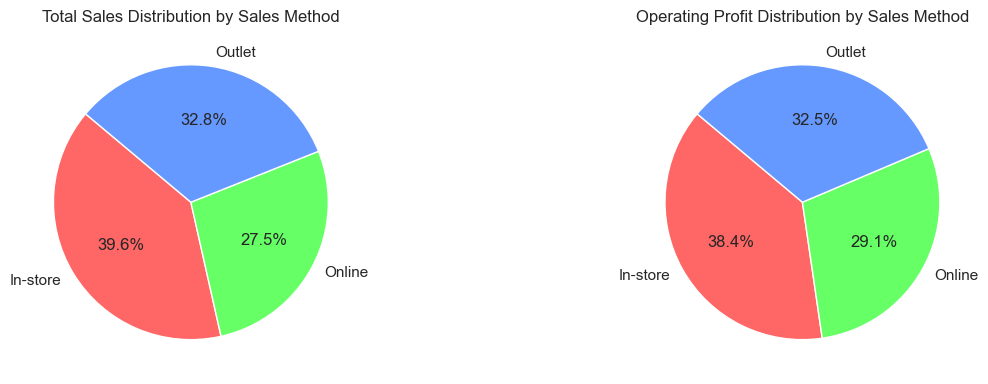

In [18]:
# Creating two pie charts to visualize the distribution of 'Total Sales' and 'Operating Profit' by 'Sales Method'

sales_method_perf = sales_method_perf.reset_index()
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
colors = ["#FF6666", "#66FF66", "#6699FF"]

axes[0].pie(sales_method_perf['Total Sales'],labels=sales_method_perf['Sales Method'],autopct='%1.1f%%',startangle=140,colors=colors)
axes[0].set_title('Total Sales Distribution by Sales Method')

axes[1].pie(sales_method_perf['Operating Profit'],labels=sales_method_perf['Sales Method'],autopct='%1.1f%%',startangle=140,colors=colors)
axes[1].set_title('Operating Profit Distribution by Sales Method')

plt.tight_layout()
plt.show()

### Key Insights from Sales Method Distribution (Pie Charts)

- **Sales Distribution**:
  - **In-store** sales make up the largest share of total sales at **39.6%**.
  - **Outlet** sales contribute **32.8%** to total sales.
  - **Online** sales account for **27.5%** of total sales.

- **Operating Profit Distribution**:
  - **In-store** sales lead in operating profit, contributing **38.4%**.
  - **Outlet** sales account for **32.5%** of operating profit.
  - **Online** sales represent **29.1%** of the operating profit.

### Conclusion:
While **in-store sales** dominate both **total sales** and **operating profit**, **online sales** show a higher operating profit share relative to their sales share, indicating better profitability per sale in the online channel. **Outlet sales** have a balanced share between sales and profit.

In [19]:
# Grouping the data by 'Gender Type' and 'Product Category' to calculate sum of 'Total Sales', 'Operating Profit', and 'Units Sold'
# then sorting by 'Operating Profit'

gender_perf = df.groupby(['Gender Type', 'Product Category']).agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index().sort_values(by='Operating Profit', ascending=False)
gender_perf

,Gender Type,Product Category,Total Sales,Operating Profit,Units Sold
2,Men,Street Footwear,208826244,82802260.62,593320
3,Women,Apparel,179038860,68650970.56,433827
1,Men,Athletic Footwear,153673680,51846888.19,435526
5,Women,Street Footwear,128002813,45095826.81,392269
0,Men,Apparel,123728632,44763030.33,306683
4,Women,Athletic Footwear,106631896,38975784.94,317236


### Key Insights from Gender Type and Product Category Data

- **Men's Street Footwear** has the highest **total sales** (~$208.8M) and **operating profit** (~$82.8M), with **593,320 units sold**.
- **Women's Apparel** follows closely with **total sales** (~$179.0M) and **operating profit** (~$68.6M), and **433,827 units sold**.
- **Men's Athletic Footwear** generates **$153.7M in total sales** and **$51.8M in operating profit**, with **435,526 units sold**.
- **Women's Street Footwear** contributes **$128.0M in sales**, **$45.1M in operating profit**, and **392,269 units sold**.
- **Men's Apparel** shows **$123.7M in sales** and **$44.8M in operating profit**, with **306,683 units sold**.
- **Women's Athletic Footwear** has the lowest sales and operating profit among the categories, with **$106.6M in sales**, **$38.9M in profit**, and **317,236 units sold**.

### Conclusion:
**Men's Street Footwear** leads in both total sales and operating profit, while **women's categories** (Apparel and Street Footwear) also show strong performance. **Women's Athletic Footwear** shows the lowest figures across both sales and profit.

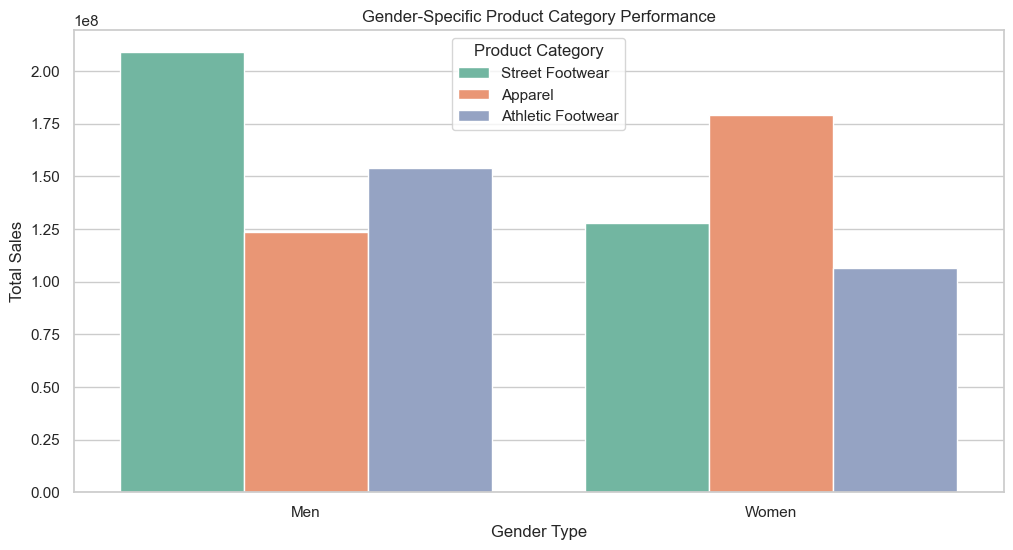

In [20]:
# Creating a bar plot to visualize 'Total Sales' by 'Gender Type' and 'Product Category'

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender Type', y='Total Sales', hue='Product Category', data=gender_perf, palette="Set2")
plt.title("Gender-Specific Product Category Performance")
plt.xticks(rotation=0)
plt.show()

### Key Insights from Gender-Specific Product Category Performance

- **Street Footwear Dominance**: Men contribute more significantly to **Street Footwear** sales, making it the highest-performing category for both genders.
- **Apparel Performance**: **Women's Apparel** exceeds **Men's Apparel** in sales, highlighting a stronger market for women's apparel.
- **Athletic Footwear Variation**: **Men's Athletic Footwear** shows higher sales than women's, indicating a preference for athletic footwear among men.
- **Gender-Based Preferences**: Men tend to favor **Street and Athletic Footwear**, while women show a stronger inclination towards **Apparel**.

### Conclusion:
The data indicates distinct gender-based preferences, with men gravitating towards footwear and women towards apparel.

In [21]:
# Grouping the data by 'Month' to calculate sum of 'Total Sales', 'Operating Profit', and 'Units Sold'

monthly_perf = df.groupby('Month').agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Units Sold': 'sum'
})
monthly_perf

,Total Sales,Operating Profit,Units Sold
Month,,,
1,71479142,25141934.51,227632
2,61100153,21392736.70,193959
3,56809109,20439788.00,190960
4,72339970,27559237.31,216426
5,80507695,29946255.33,214605
6,74747372,26714715.92,181014
7,95480694,34054898.59,218700
8,92166201,34451440.30,257721
9,77661459,31009586.73,228550


### Key Insights from Monthly Performance Data

- **Highest Sales and Profit**: **Month 7** (July) shows the highest **Total Sales** and **Operating Profit**, making it the peak month for performance.
- **Steady Performance**: The months generally show steady sales, with **Month 5** (May) also contributing significantly to **Total Sales** and **Operating Profit**.
- **Lowest Performance**: **Month 3** (March) has the lowest sales and profit, indicating weaker performance during this month.
- **Units Sold**: **Month 8** (August) has the highest **Units Sold**, suggesting higher volume sales during this period.

### Conclusion:
July and May are the standout months in terms of sales and profit, while March underperforms. The trend shows stable performance throughout the year with notable peaks in certain months.

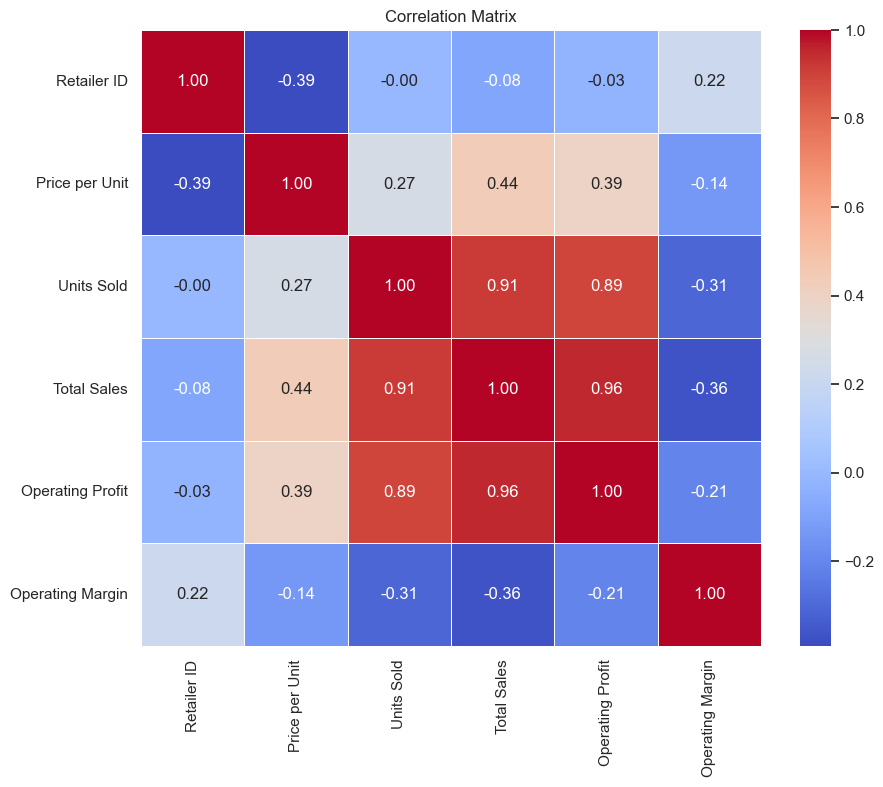

In [22]:
# Creating a heatmap to visualize the correlation matrix of numerical features in the dataset

numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix")
plt.show()

### Key Insights from the Correlation Matrix

- **Strong Positive Correlations**:
  - **Units Sold, Total Sales, Operating Profit**: These metrics are strongly correlated (ranging from 0.89 to 0.96). As units sold increase, both sales and profit rise significantly.
  - **Total Sales and Operating Profit**: A very strong correlation of 0.96, indicating that increases in sales are closely reflected in operating profit.
- **Moderate Positive Correlation**:
  - **Price per Unit**: There is a moderate correlation (0.27 to 0.44) between price per unit and units sold, sales, and profit. While price increases may lead to higher revenue, the effect is less pronounced than units sold.
- **Weak or No Correlation**:
  - **Retailer ID**: The retailer ID has weak correlations with other metrics, suggesting no significant linear relationship with sales or profit.
- **Negative Correlations**:
  - **Operating Margin with Units Sold, Total Sales, Operating Profit**: These show negative correlations (-0.21 to -0.36), meaning higher sales and profit tend to lower the operating margin, potentially due to higher costs.
  - **Price per Unit and Operating Margin**: A small negative correlation (-0.14), suggesting higher prices might slightly reduce operating margins.

### Observations:
- The strong relationship between **Total Sales** and **Operating Profit** suggests that changes in sales almost directly impact profit.
- The **Operating Margin** faces challenges as sales increase, possibly due to rising costs associated with higher volumes.
- **Units Sold** is the primary driver of financial performance, with **Price per Unit** playing a smaller role.

### Conclusion:
To improve profitability, focusing on cost management strategies to improve operating margin while maintaining strong sales growth is essential.


In [23]:
# Grouping the data by month ('Invoice Date' converted to period) to calculate the sum of 'Total Sales' and 'Operating Profit'

time_summary = df.groupby(df['Invoice Date'].dt.to_period('M')).agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum'
}).reset_index()

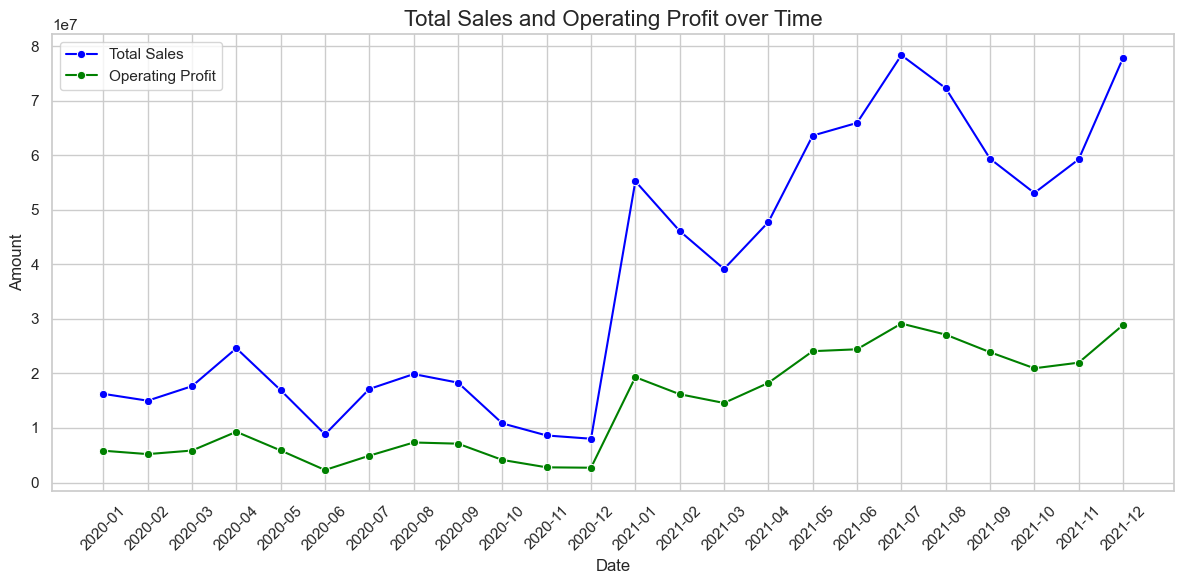

In [24]:
# Creating line plots to visualize 'Total Sales' and 'Operating Profit' over time (monthly) with markers

plt.figure(figsize=(12, 6))
sns.lineplot(x=time_summary['Invoice Date'].astype(str), y='Total Sales', data=time_summary, label='Total Sales', color='blue', marker='o')
sns.lineplot(x=time_summary['Invoice Date'].astype(str), y='Operating Profit', data=time_summary, label='Operating Profit', color='green', marker='o')
plt.title('Total Sales and Operating Profit over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Insights from the Total Sales and Operating Profit Trend

- **Total Sales Trend**:
  - Sales were stable between January 2020 and November 2020, hovering between 1 and 2 million.
  - A significant spike occurred in December 2020, reaching over 5 million, likely due to seasonal factors.
  - Sales peaked in July 2021, nearing 8 million, before declining and then rising again towards the end of 2021.
- **Operating Profit Trend**:
  - Operating profit followed a similar trend to sales but remained lower in value.
  - Profit was stable and low throughout 2020.
  - A notable increase in profit in December 2020 aligned with the sales spike.
  - The highest profit occurred in July 2021, matching the peak in sales.
- **Sales and Profit Relationship**:
  - There is a strong positive correlation between total sales and operating profit, where increases in sales generally result in higher profits.
  - Profit changes are less pronounced compared to sales changes, which is typical due to cost structures.
- **Potential Influencing Factors**:
  - **December 2020**: Likely driven by seasonal factors (e.g., holiday shopping).
  - **Mid-2021 Peak**: Possible effects of successful marketing campaigns or favorable market conditions.
  - **Declines**: Could be caused by increased competition, reduced demand, or external economic challenges.

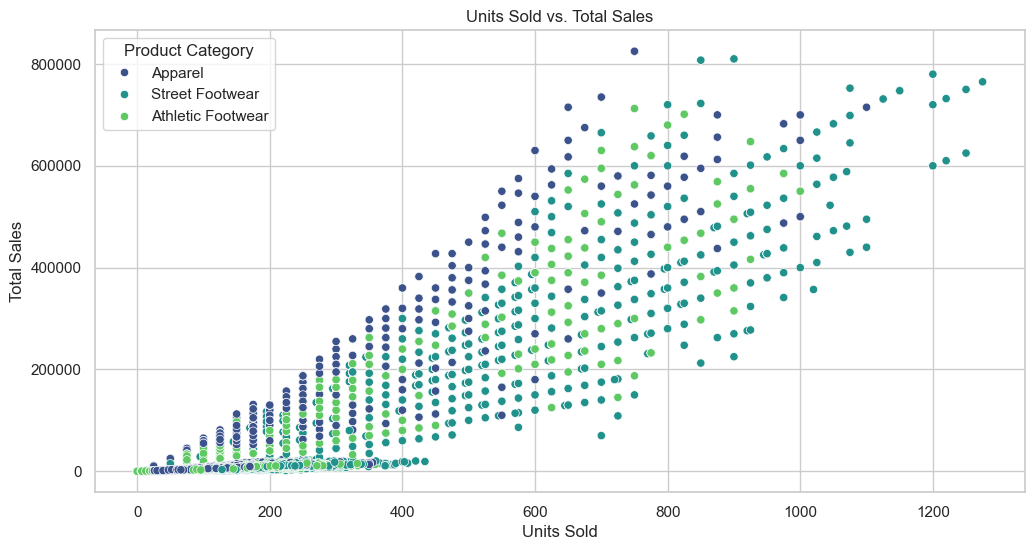

In [25]:
# Creating a scatter plot to visualize the relationship between 'Units Sold' and 'Total Sales' by 'Product Category'

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Units Sold", y="Total Sales", data=df, hue="Product Category", palette="viridis")
plt.title("Units Sold vs. Total Sales")
plt.show()

### Insights from the Scatter Plot (Units Sold vs. Total Sales)

- **Positive Correlation**: 
  - There is a clear positive correlation between units sold and total sales, as expected.

- **Category Comparison**:
  - **Apparel** (dark blue): Shows lower sales at higher unit volumes compared to other categories.
  - **Street Footwear** (light blue): Strong performance in mid-range sales, indicating consistent demand.
  - **Athletic Footwear** (green): Exhibits the highest sales, particularly at higher unit volumes, indicating strong market performance.

- **Saturation Point**:
  - Total sales growth tapers off at higher unit sales, suggesting a saturation point where increased volume doesn’t significantly boost sales.

- **Outliers**:
  - Athletic Footwear has some outliers with high sales but fewer units sold, possibly representing premium products or high-value transactions.

- **Key Insights**:
  - **Market Performance**: Athletic Footwear leads, followed by Street Footwear, with Apparel trailing behind.
  - **Sales Strategy**: Focus on boosting Apparel sales or leverage the strong performance of Athletic Footwear.
  - **Inventory Management**: The saturation point can help optimize inventory levels and resource allocation.
  - **Pricing & Promotion**: Analyzing outliers could uncover strategies for high-value sales that can be replicated.


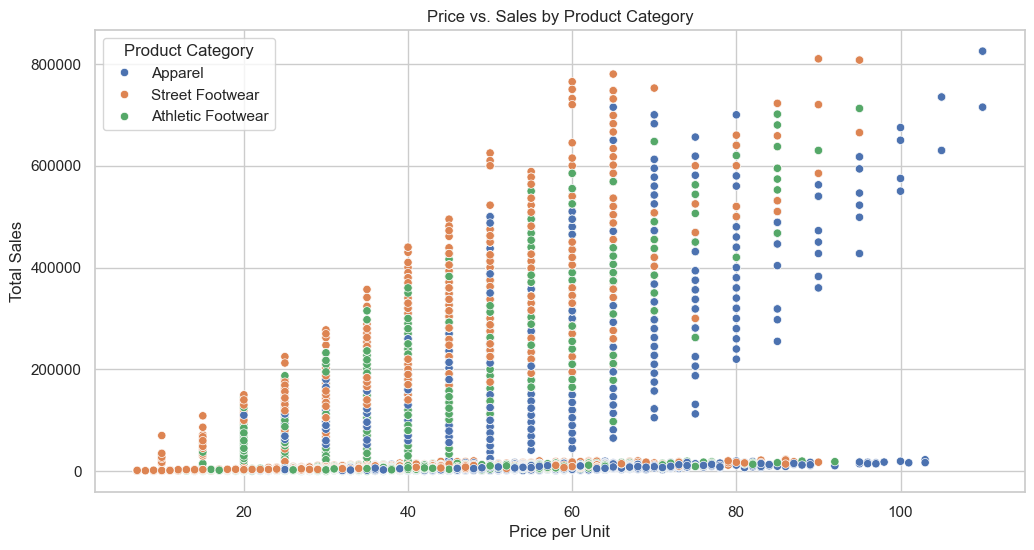

In [26]:
# Creating a scatter plot to visualize the relationship between 'Price per Unit' and 'Total Sales' by 'Product Category'

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Price per Unit", y="Total Sales", data=df, hue="Product Category", palette="deep")
plt.title("Price vs. Sales by Product Category")
plt.show()

### Insights from the Scatter Plot (Price per Unit vs. Total Sales)

- **Sales Peak**: 
  - Sales are highest when the price per unit is around $60-$70 for all categories.

- **Price Sensitivity**:
  - **Apparel**: Sales show a gradual increase and decrease with price changes.
  - **Street Footwear & Athletic Footwear**: Sales peak sharply around $60-$70, indicating higher price sensitivity.

- **Sales at Higher Prices**:
  - **Apparel**: Maintains sales even at higher price points (above $80).
  - **Footwear**: Sales significantly drop at higher prices, showing lower consumer willingness to pay more.

- **Sales at Lower Prices**:
  - All categories show low sales below $20.

- **Key Insights**:
  - **Pricing Strategy**: Focusing on the $60-$70 range for footwear could boost sales, while apparel might benefit from a broader pricing approach.
  - **Inventory & Marketing**: Understanding these price sensitivities can help optimize pricing, inventory management, and targeted marketing efforts.

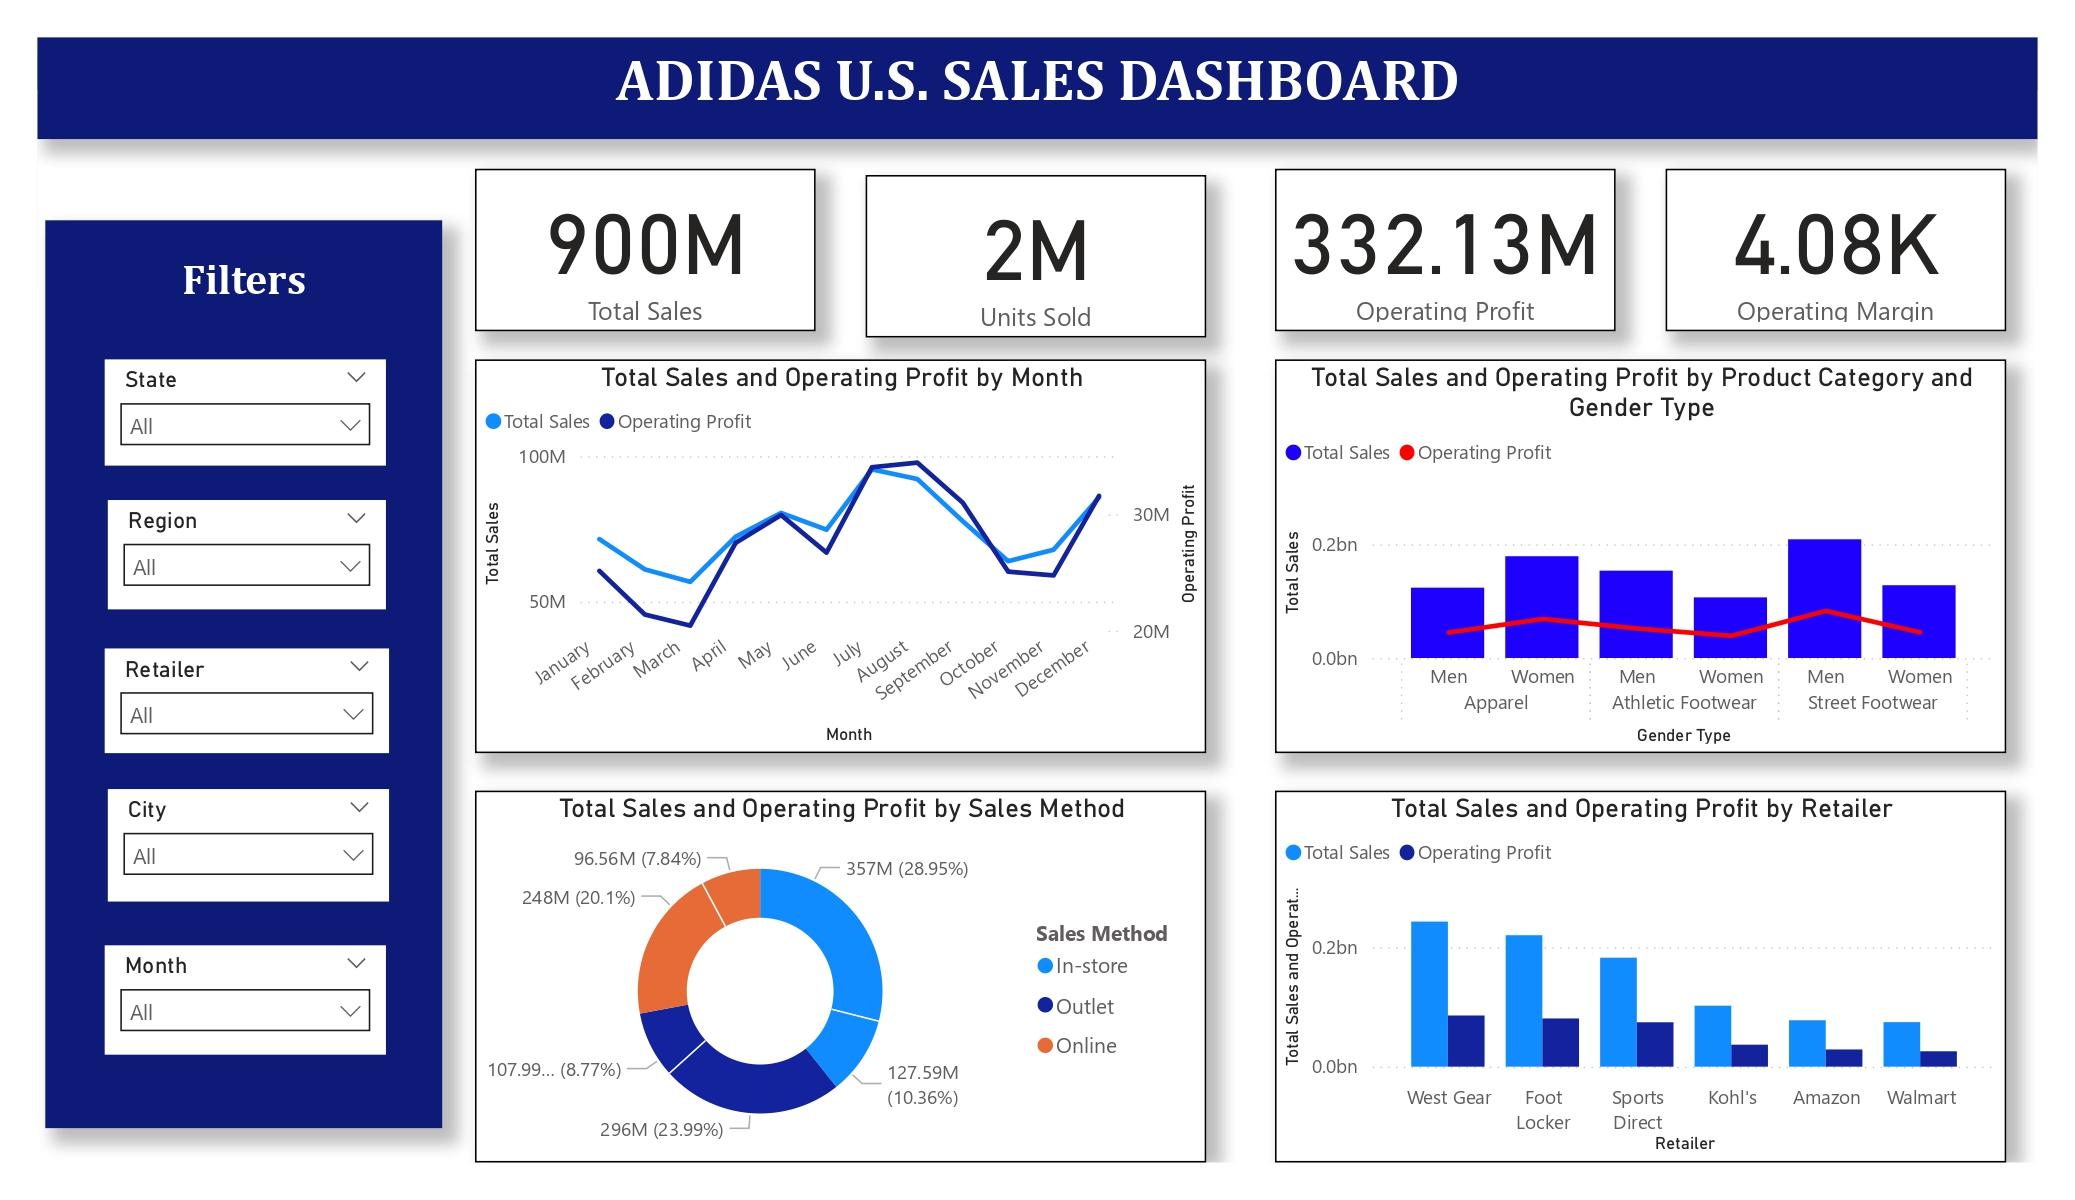

In [27]:
# Displaying the Adidas U.S, Sales Dashboard exported from Power BI
img = 'Adidas Sales Dashboard.jpg'
display(Image(filename=img))

### Key Insights from Adidas U.S. Sales Dashboard

- **Total Sales & Units Sold**: $900 million in total sales, with 2 million units sold.
- **Operating Profit & Margin**: Operating profit: $332.13 million, with an operating margin of 4.08K.
- **Sales Performance by Month**: The line chart highlights fluctuations in total sales and operating profit, with noticeable peaks and dips.
- **Sales by Product Category & Gender**: A bar chart compares sales and operating profit for **Apparel, Athletic Footwear, and Street Footwear**, split by gender (men and women).
- **Sales by Sales Method**: A donut chart shows sales distribution by method: **Online (28.95%, $357M)**, followed by in-store and outlet.
- **Sales by Retailer**: A bar chart compares sales and operating profit across various retailers, revealing each partner's performance.


### <span style="color:#4361ee"><strong>Summary of Insights Gained</strong></span>:

- Street Footwear is the best-selling and most profitable product category, closely followed by Apparel.
- Athletic Footwear has slightly lower sales but maintains a strong operating margin close to other categories.
- West Gear and Foot Locker lead in total sales and profits, while Sports Direct has the highest operating margin (44.5%).
- Profitability across retailers remains relatively stable, with only minor variations.
- West region dominates sales across all product categories, especially in Street Footwear.
- Midwest region records the lowest sales performance among all regions.
- Sales and profits peak during July, August, and December, indicating strong seasonal demand.
- March consistently shows the weakest sales and profit performance.
- A sharp growth in overall sales and profits is observed throughout 2021 compared to 2020.
- Men generate the highest sales and profits in Street Footwear, while women dominate in Apparel sales.
- Street Footwear remains the top-selling and most profitable product category for both men and women.
- Charleston has the highest profit-to-sales ratio among cities, making it highly efficient in profitability.
- New York and Miami also emerge as highly profitable cities.
- Online sales yield the highest operating margin (46.4%) despite contributing less revenue compared to in-store sales.
- Outlet sales show solid revenue and profitability, better than in-store sales margins.
- Units Sold and Total Sales are strongly correlated (0.91), directly boosting Operating Profit (0.89).
- Total Sales and Operating Profit also show a very strong positive correlation (0.96).
- Price per Unit has a moderate positive correlation with Total Sales and Operating Profit.
- Operating Margin tends to decrease slightly with higher units sold and higher total sales, indicating potential discounting effects.
- Month has very little correlation with sales, suggesting weak seasonality effects in the data.
- Apparel shows the highest profitability potential with high average selling prices and consistent sales.
- Optimal pricing strategies exist for footwear categories, with sales plateauing after a certain price point.
- Stable pricing behavior is observed, but dynamic pricing may further improve sales and profitability.
- Retailers focusing on lower-priced items show negative correlation between Price per Unit and Retailer ID.

### <span style="color:#4361ee"><strong>Business Recommendations</strong></span>:

- Increase variety in **Street Footwear** and **Apparel** with exclusive collections to capitalize on strong sales.
- Boost marketing and promotions in the **Midwest** and expand **Online Sales** in underperforming regions.
- Create seasonal campaigns targeting peak months like **July, August**, and **December**, and offer promotions to counter the **March** dip.
- Enhance online presence to drive higher revenue, leveraging the high **Online Sales** margin.
- Implement dynamic pricing for **footwear** to maximize sales without affecting margins, focusing on optimal price points.
- Increase **Outlet Sales** by opening more outlets in profitable areas, leveraging higher margins.
- Develop exclusive collections for **men** in **Street Footwear** and for **women** in **Apparel** to align with sales trends.
- Expand retail and marketing efforts in profitable cities like **Charleston, New York**, and **Miami**.
- Focus on higher-priced, high-margin products to enhance overall profit without increasing volume.
- Customize marketing efforts by region, emphasizing product categories that perform best in each area (e.g., **Street Footwear** in the **West**).